<a href="https://colab.research.google.com/github/ManasaCherukupally1/Projects/blob/main/MachineLearning/Demand_Forcasting_through_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# To print multiple output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
## Import all the required libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('/content/train.csv')

test=pd.read_csv('/content/test.csv')

In [7]:
train.head(10)
print('Shape of training data is {}'.format(train.shape))

print('-------------'*5)

test.head()
print('Shape of test data is {}'.format(test.shape))

print('--------------'*5)



,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
5,9,17/01/11,8091,219009,227.2875,227.2875,0,0,18
6,10,17/01/11,8091,219029,327.0375,327.0375,0,0,47
7,13,17/01/11,8091,223245,210.9000,210.9000,0,0,50
8,14,17/01/11,8091,223153,190.2375,234.4125,1,1,82
9,17,17/01/11,8095,216418,99.0375,99.0375,0,0,99


Shape of training data is (150150, 9)
-----------------------------------------------------------------


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


Shape of test data is (13860, 8)
----------------------------------------------------------------------


In [8]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [9]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [10]:
train['week'].unique()

array(['17/01/11', '24/01/11', '31/01/11', '07/02/11', '14/02/11',
       '21/02/11', '28/02/11', '07/03/11', '14/03/11', '21/03/11',
       '28/03/11', '04/04/11', '11/04/11', '18/04/11', '25/04/11',
       '02/05/11', '09/05/11', '16/05/11', '23/05/11', '30/05/11',
       '06/06/11', '13/06/11', '20/06/11', '27/06/11', '04/07/11',
       '11/07/11', '18/07/11', '25/07/11', '01/08/11', '08/08/11',
       '15/08/11', '22/08/11', '29/08/11', '05/09/11', '12/09/11',
       '19/09/11', '26/09/11', '03/10/11', '10/10/11', '17/10/11',
       '24/10/11', '31/10/11', '07/11/11', '14/11/11', '21/11/11',
       '28/11/11', '05/12/11', '12/12/11', '19/12/11', '26/12/11',
       '02/01/12', '09/01/12', '16/01/12', '23/01/12', '30/01/12',
       '06/02/12', '13/02/12', '20/02/12', '27/02/12', '06/03/12',
       '13/03/12', '20/03/12', '27/03/12', '03/04/12', '10/04/12',
       '17/04/12', '24/04/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '29/05/12', '05/06/12', '12/06/12', '19/06/

<Axes: xlabel='week'>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'units_sold')

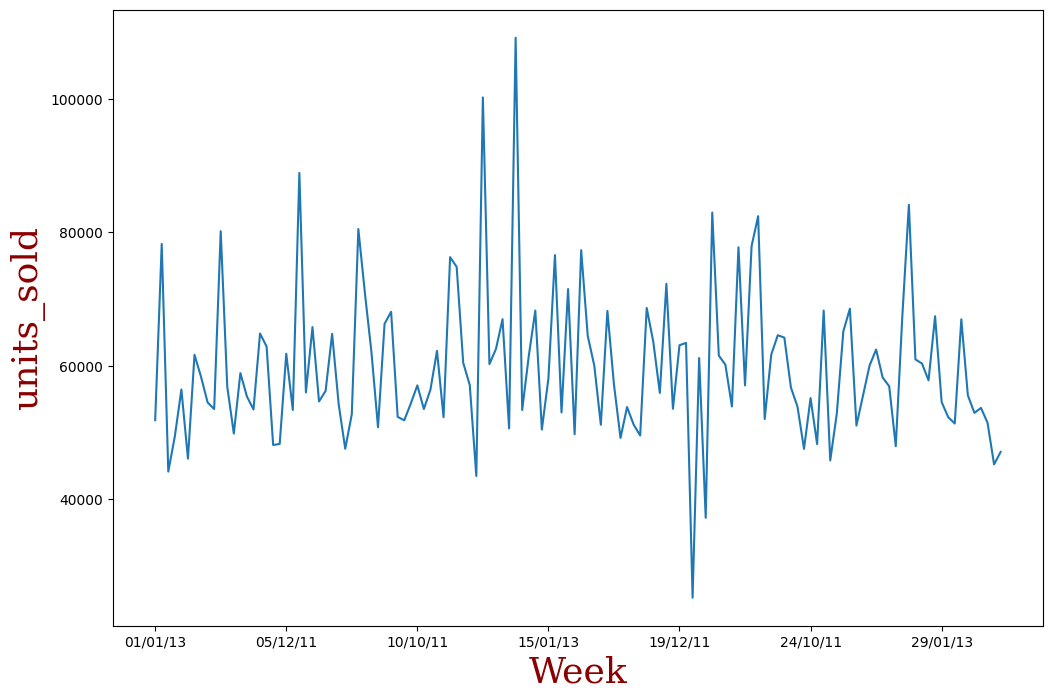

In [11]:
# Number of units sold in accordance with the week

train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('Week',fontdict=font)
plt.ylabel('units_sold',fontdict=font)

<Axes: xlabel='week'>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'total_price')

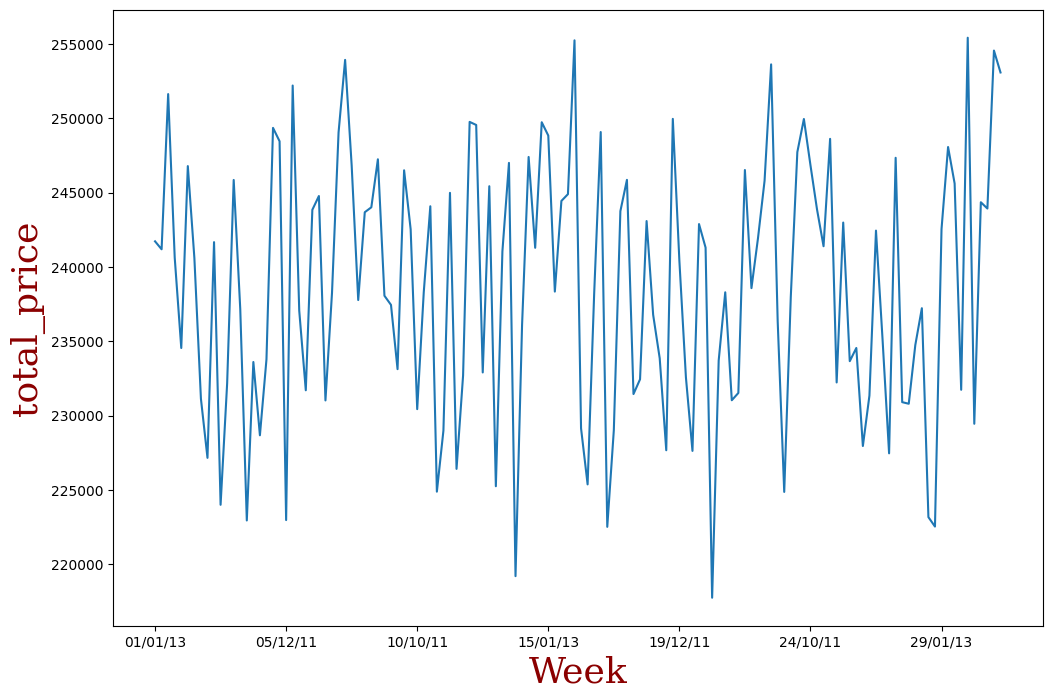

In [12]:
# amount earned through sales in each week

train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('Week',fontdict=font)
plt.ylabel('total_price',fontdict=font)

<ipython-input-13-069e85e4dac7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')


<Axes: xlabel='store_id'>

Text(0.5, 0, 'store_id')

Text(0, 0.5, 'units_sold')

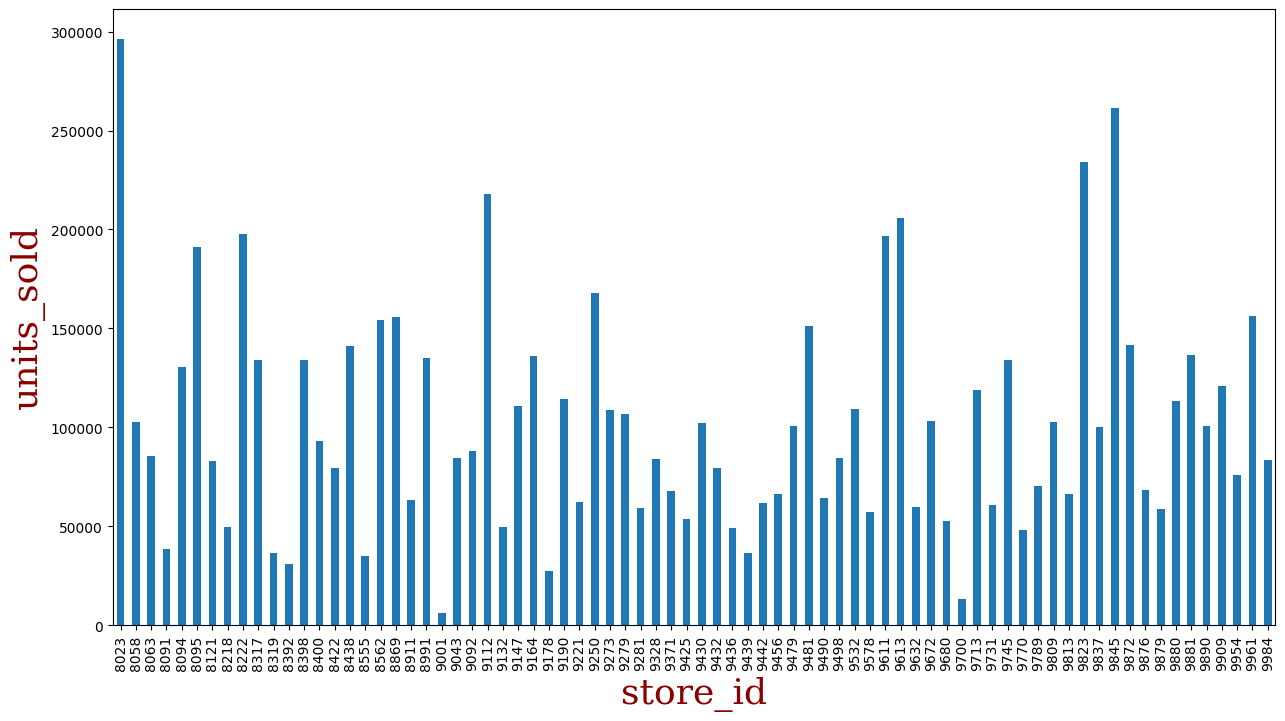

In [13]:
## product sold by each of the store


train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }
plt.xlabel('store_id',fontdict=font)
plt.ylabel('units_sold',fontdict=font)

In [16]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

df.head()
df.shape

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,train
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,train
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,train
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,train
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,train


(164010, 10)

In [17]:
# function to utilize date time column i.e '''week'''

def create_week_date_featues(dataframe):

    df['Month'] = pd.to_datetime(df['week']).dt.month

    df['Day'] = pd.to_datetime(df['week']).dt.day

    df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

    df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

    df['Week'] = pd.to_datetime(df['week']).dt.week

    df['Quarter'] = pd.to_datetime(df['week']).dt.quarter

    df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

    df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

    df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

    df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

    df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

    df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

    df['Semester'] = np.where(df['week'].isin([1,2]),1,2)

    df['Is_weekend'] = np.where(df['week'].isin([5,6]),1,0)

    df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)

    df['Days_in_month'] = pd.to_datetime(df['week']).dt.days_in_month

    return df
df=create_week_date_featues(df)
df.head(5)
df.shape


<ipython-input-17-7578ec93436e>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = pd.to_datetime(df['week']).dt.week


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,...,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Semester,Is_weekend,Is_weekday,Days_in_month
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,train,...,False,False,False,False,False,False,2,0,0,31
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,train,...,False,False,False,False,False,False,2,0,0,31
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,train,...,False,False,False,False,False,False,2,0,0,31
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,train,...,False,False,False,False,False,False,2,0,0,31
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,train,...,False,False,False,False,False,False,2,0,0,31


(164010, 26)

In [18]:
from sklearn.preprocessing import LabelEncoder
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']
for i in col:
    df = pd.get_dummies(df, columns=[i])
df.head()

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,17/01/11,99.0375,111.8625,0,0,20.0,train,1,17,...,1,0,1,0,1,0,1,1,0,1
1,2,17/01/11,99.0375,99.0375,0,0,28.0,train,1,17,...,1,0,1,0,1,0,1,1,0,1
2,3,17/01/11,133.9500,133.9500,0,0,19.0,train,1,17,...,1,0,1,0,1,0,1,1,0,1
3,4,17/01/11,133.9500,133.9500,0,0,44.0,train,1,17,...,1,0,1,0,1,0,1,1,0,1
4,5,17/01/11,141.0750,141.0750,0,0,52.0,train,1,17,...,1,0,1,0,1,0,1,1,0,1


In [19]:
df.drop(['record_ID','week'],inplace=True,axis=1)
df.head()
df.shape

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,train_or_test,Month,Day,Dayofweek,DayOfyear,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,train,1,17,0,17,...,1,0,1,0,1,0,1,1,0,1
1,99.0375,99.0375,0,0,28.0,train,1,17,0,17,...,1,0,1,0,1,0,1,1,0,1
2,133.9500,133.9500,0,0,19.0,train,1,17,0,17,...,1,0,1,0,1,0,1,1,0,1
3,133.9500,133.9500,0,0,44.0,train,1,17,0,17,...,1,0,1,0,1,0,1,1,0,1
4,141.0750,141.0750,0,0,52.0,train,1,17,0,17,...,1,0,1,0,1,0,1,1,0,1


(164010, 130)

<Axes: ylabel='Frequency'>

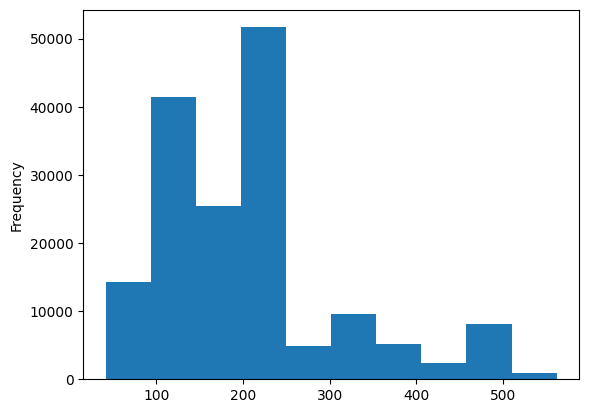

In [20]:
# Total price columns

df['total_price'].plot(kind='hist')

<Axes: ylabel='Frequency'>

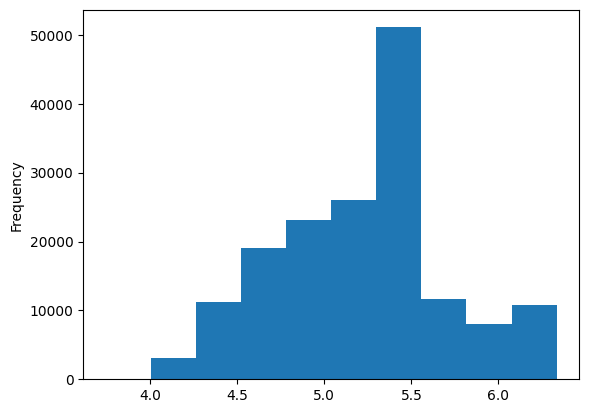

In [21]:
df['total_price']=np.log1p(df['total_price'])
df['total_price'].plot(kind='hist')

<Axes: ylabel='Frequency'>

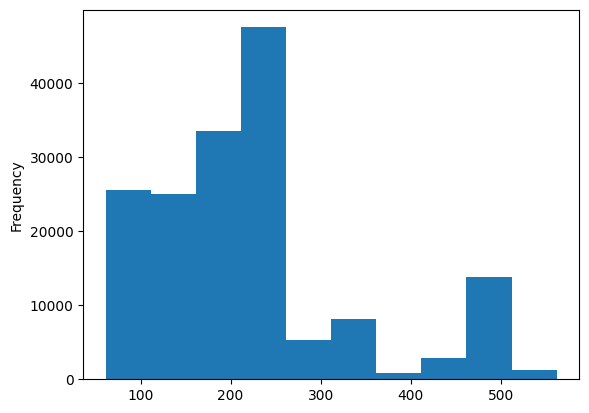

In [22]:
df['base_price'].plot(kind='hist')

<Axes: ylabel='Frequency'>

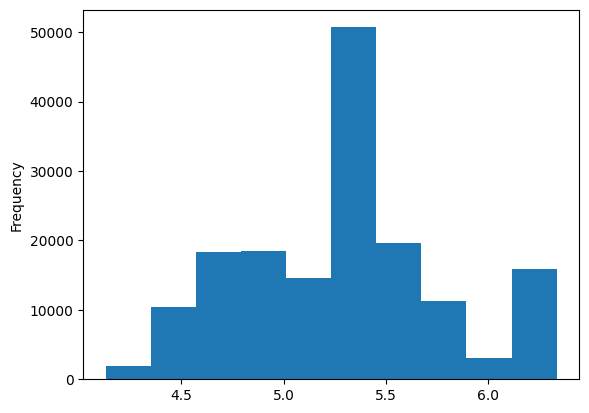

In [23]:
df['base_price']=np.log1p(df['base_price'])
df['base_price'].plot(kind='hist')

In [24]:
train_1=df.loc[df.train_or_test.isin(['train'])]
test_1=df.loc[df.train_or_test.isin(['test'])]
train_1.drop(columns={'train_or_test'},axis=1,inplace=True)
test_1.drop(columns={'train_or_test'},axis=1,inplace=True)

<ipython-input-24-6a2d622a245a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1.drop(columns={'train_or_test'},axis=1,inplace=True)
<ipython-input-24-6a2d622a245a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.drop(columns={'train_or_test'},axis=1,inplace=True)


In [25]:
train_1.head()
train_1.shape
test_1.shape
test_1.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Month,Day,Dayofweek,DayOfyear,Week,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,4.605545,4.726170,0,0,20.0,1,17,0,17,3,...,1,0,1,0,1,0,1,1,0,1
1,4.605545,4.605545,0,0,28.0,1,17,0,17,3,...,1,0,1,0,1,0,1,1,0,1
2,4.904904,4.904904,0,0,19.0,1,17,0,17,3,...,1,0,1,0,1,0,1,1,0,1
3,4.904904,4.904904,0,0,44.0,1,17,0,17,3,...,1,0,1,0,1,0,1,1,0,1
4,4.956355,4.956355,0,0,52.0,1,17,0,17,3,...,1,0,1,0,1,0,1,1,0,1


(150150, 129)

(13860, 129)

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Month,Day,Dayofweek,DayOfyear,Week,...,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,4.694096,4.694096,0,0,NaN,7,16,1,197,29,...,1,0,1,0,1,0,1,1,0,1
1,4.700594,4.700594,0,0,NaN,7,16,1,197,29,...,1,0,1,0,1,0,1,1,0,1
2,4.904904,4.904904,0,0,NaN,7,16,1,197,29,...,1,0,1,0,1,0,1,1,0,1
3,4.904904,4.904904,0,0,NaN,7,16,1,197,29,...,1,0,1,0,1,0,1,1,0,1
4,5.180097,5.180097,0,0,NaN,7,16,1,197,29,...,1,0,1,0,1,0,1,1,0,1


In [26]:
test_1.drop(['units_sold'],axis=1,inplace=True)

<ipython-input-26-2e6c97c94850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1.drop(['units_sold'],axis=1,inplace=True)


In [27]:
train_1.shape
test_1.shape

(150150, 129)

(13860, 128)

In [28]:

x=train_1.drop(['units_sold'],axis=1)
y=train_1['units_sold']
x=x.values
test_data=test_1.values

y=y.values
x.shape
test_data.shape

(150150, 128)

(13860, 128)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb

# function to plot all features based out of its importance.
def plot_features(booster, figsize):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time

In [31]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

model = XGBRegressor(
    max_depth=12,
    booster = "gbtree",
    n_estimators=200,
    eval_metric = 'rmse',
    min_child_weight=300,
    colsample_bytree=0.8,
    subsample=0.8,
    eta=0.3,
    seed=42,
    objective='reg:linear')
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()

for train, test in kfold.split(x):
    x_train, x_test =x[train], x[test]
    y_train, y_test = y[train], y[test]
    model.fit(x_train, y_train,verbose=True,
              eval_set=[(x_train, y_train), (x_test, y_test)],
              early_stopping_rounds = 50)

[0]	validation_0-rmse:53.24718	validation_1-rmse:51.56619


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:09:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[1]	validation_0-rmse:49.58476	validation_1-rmse:47.94721
[2]	validation_0-rmse:46.82619	validation_1-rmse:45.25989
[3]	validation_0-rmse:44.21468	validation_1-rmse:42.83450
[4]	validation_0-rmse:42.20507	validation_1-rmse:40.86861
[5]	validation_0-rmse:41.38528	validation_1-rmse:40.08945
[6]	validation_0-rmse:40.40658	validation_1-rmse:39.13433
[7]	validation_0-rmse:39.72707	validation_1-rmse:38.47614
[8]	validation_0-rmse:39.23323	validation_1-rmse:38.03335
[9]	validation_0-rmse:38.51997	validation_1-rmse:37.38471
[10]	validation_0-rmse:38.15989	validation_1-rmse:37.03164
[11]	validation_0-rmse:37.70215	validation_1-rmse:36.57289
[12]	validation_0-rmse:37.23308	validation_1-rmse:36.15173
[13]	validation_0-rmse:36.95975	validation_1-rmse:35.92132
[14]	validation_0-rmse:36.65021	validation_1-rmse:35.66340
[15]	validation_0-rmse:36.23029	validation_1-rmse:35.22370
[16]	validation_0-rmse:36.10521	validation_1-rmse:35.11646
[17]	validation_0-rmse:35.82874	validation_1-rmse:34.83347
[18]	v

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=300, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

[0]	validation_0-rmse:53.01274	validation_1-rmse:52.64117
[1]	validation_0-rmse:49.40282	validation_1-rmse:49.03537


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:10:20] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[2]	validation_0-rmse:46.65987	validation_1-rmse:46.28098
[3]	validation_0-rmse:43.96599	validation_1-rmse:43.46951
[4]	validation_0-rmse:42.12992	validation_1-rmse:41.60152
[5]	validation_0-rmse:41.27305	validation_1-rmse:40.80899
[6]	validation_0-rmse:40.29551	validation_1-rmse:39.84020
[7]	validation_0-rmse:39.61150	validation_1-rmse:39.13671
[8]	validation_0-rmse:39.00735	validation_1-rmse:38.57312
[9]	validation_0-rmse:38.22878	validation_1-rmse:37.76128
[10]	validation_0-rmse:37.76760	validation_1-rmse:37.29733
[11]	validation_0-rmse:37.48756	validation_1-rmse:36.99937
[12]	validation_0-rmse:37.25429	validation_1-rmse:36.75900
[13]	validation_0-rmse:36.91879	validation_1-rmse:36.44263
[14]	validation_0-rmse:36.57501	validation_1-rmse:36.06529
[15]	validation_0-rmse:36.14761	validation_1-rmse:35.66182
[16]	validation_0-rmse:36.04123	validation_1-rmse:35.56702
[17]	validation_0-rmse:35.82297	validation_1-rmse:35.39172
[18]	validation_0-rmse:35.61301	validation_1-rmse:35.19308
[19]	

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=300, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:10:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:51.98144	validation_1-rmse:56.92901
[1]	validation_0-rmse:48.37819	validation_1-rmse:53.56547
[2]	validation_0-rmse:45.68590	validation_1-rmse:50.99482
[3]	validation_0-rmse:42.99692	validation_1-rmse:48.32687
[4]	validation_0-rmse:40.92707	validation_1-rmse:46.45794
[5]	validation_0-rmse:39.97576	validation_1-rmse:45.54368
[6]	validation_0-rmse:39.02171	validation_1-rmse:44.61893
[7]	validation_0-rmse:38.29850	validation_1-rmse:43.94699
[8]	validation_0-rmse:37.71257	validation_1-rmse:43.39106
[9]	validation_0-rmse:37.24416	validation_1-rmse:42.94369
[10]	validation_0-rmse:36.87563	validation_1-rmse:42.59112
[11]	validation_0-rmse:36.61669	validation_1-rmse:42.37396
[12]	validation_0-rmse:36.03523	validation_1-rmse:41.75748
[13]	validation_0-rmse:35.84183	validation_1-rmse:41.60005
[14]	validation_0-rmse:35.35636	validation_1-rmse:41.04205
[15]	validation_0-rmse:35.07255	validation_1-rmse:40.69194
[16]	validation_0-rmse:34.93046	validation_1-rmse:40.58609
[17]	va

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=300, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

[0]	validation_0-rmse:53.31776	validation_1-rmse:51.83169


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:11:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[1]	validation_0-rmse:49.74312	validation_1-rmse:48.30337
[2]	validation_0-rmse:47.02447	validation_1-rmse:45.67641
[3]	validation_0-rmse:44.35771	validation_1-rmse:43.13313
[4]	validation_0-rmse:42.30966	validation_1-rmse:41.06918
[5]	validation_0-rmse:41.36265	validation_1-rmse:40.10154
[6]	validation_0-rmse:40.41839	validation_1-rmse:39.15221
[7]	validation_0-rmse:39.75031	validation_1-rmse:38.51500
[8]	validation_0-rmse:39.33580	validation_1-rmse:38.09708
[9]	validation_0-rmse:38.56825	validation_1-rmse:37.42618
[10]	validation_0-rmse:38.12664	validation_1-rmse:36.99396
[11]	validation_0-rmse:37.73085	validation_1-rmse:36.63760
[12]	validation_0-rmse:37.26877	validation_1-rmse:36.26415
[13]	validation_0-rmse:37.05966	validation_1-rmse:36.06327
[14]	validation_0-rmse:36.57748	validation_1-rmse:35.70221
[15]	validation_0-rmse:36.27958	validation_1-rmse:35.45958
[16]	validation_0-rmse:36.02151	validation_1-rmse:35.28073
[17]	validation_0-rmse:35.83855	validation_1-rmse:35.08661
[18]	v

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=300, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:11:31] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:53.13453	validation_1-rmse:51.79346
[1]	validation_0-rmse:49.55096	validation_1-rmse:48.10731
[2]	validation_0-rmse:46.81647	validation_1-rmse:45.36287
[3]	validation_0-rmse:44.06164	validation_1-rmse:42.64532
[4]	validation_0-rmse:42.21853	validation_1-rmse:40.74247
[5]	validation_0-rmse:41.22214	validation_1-rmse:39.78352
[6]	validation_0-rmse:40.07676	validation_1-rmse:38.62378
[7]	validation_0-rmse:39.20769	validation_1-rmse:37.73410
[8]	validation_0-rmse:38.64873	validation_1-rmse:37.20593
[9]	validation_0-rmse:38.10557	validation_1-rmse:36.65161
[10]	validation_0-rmse:37.44335	validation_1-rmse:36.03373
[11]	validation_0-rmse:37.12383	validation_1-rmse:35.71596
[12]	validation_0-rmse:36.75140	validation_1-rmse:35.35004
[13]	validation_0-rmse:36.51027	validation_1-rmse:35.12097
[14]	validation_0-rmse:36.20406	validation_1-rmse:34.84839
[15]	validation_0-rmse:35.85389	validation_1-rmse:34.51984
[16]	validation_0-rmse:35.67601	validation_1-rmse:34.36249
[17]	va

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric='rmse',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=300, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
pred=model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate the model using different regression metrics
mse = mean_squared_error(y_test, pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
r2 = r2_score(y_test, pred)  # R-squared (Coefficient of Determination)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 681.6702563824877
Mean Absolute Error: 14.876490229100753
R-squared: 0.8062006350516062
